In [1]:
import numpy as np #To do some operations with the arrays
import matplotlib.pyplot as plt #visualize the data in the form of graphs
import pandas as pd #Read the dataset
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import statistics

In [2]:
data=pd.read_csv("C:/Users/Shweta Varude/Downloads/customer-data.csv")
data.head() #See first five rows

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [3]:
data.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [4]:
data.shape #Checking for dimension of the data

(10000, 19)

In [5]:
data.info() #Gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [6]:
data.describe() #Statistical summary of the data

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates() #Drop the duplicate data

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


In [9]:
# Correlation between variables
data.corr()

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
credit_score,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIs,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


In [10]:
data.cov() #Covariance

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,8.411785e+10,68.152385,1225.860846,2150.084141,165.512447,3.312610e+07,-1.814305e+06,5303.072914,1491.789872,877.487996,-1413.459746
credit_score,6.815239e+01,0.018958,0.019703,0.019363,0.014065,2.340301e+01,-6.779112e+01,0.063273,0.009733,0.041228,-0.020783
vehicle_ownership,1.225861e+03,0.019703,0.211212,0.040359,0.026809,-4.230016e+01,-1.262692e+02,0.137932,0.022080,0.090768,-0.080778
married,2.150084e+03,0.019363,0.040359,0.250022,0.066446,1.139258e+02,-6.513609e+02,0.245344,0.033534,0.177869,-0.060792
children,1.655124e+02,0.014065,0.026809,0.066446,0.214376,1.831364e+02,-5.843333e+02,0.228801,0.029642,0.157836,-0.050006
postal_code,3.312610e+07,23.403007,-42.300165,113.925780,183.136376,3.578004e+08,-7.136007e+06,4821.201398,404.085431,-3656.620037,841.347421
annual_mileage,-1.814305e+06,-67.791116,-126.269210,-651.360920,-584.333330,-7.136007e+06,7.943573e+06,-2047.434885,-182.965713,-916.734231,244.129727
speeding_violations,5.303073e+03,0.063273,0.137932,0.245344,0.228801,4.821201e+03,-2.047435e+03,5.026410,0.447735,1.641477,-0.303523
DUIs,1.491790e+03,0.009733,0.022080,0.033534,0.029642,4.040854e+02,-1.829657e+02,0.447735,0.308014,0.237857,-0.048746
past_accidents,8.774880e+02,0.041228,0.090768,0.177869,0.157836,-3.656620e+03,-9.167342e+02,1.641477,0.237857,2.730603,-0.238763


In [11]:
df=data["credit_score"]
df

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: credit_score, Length: 10000, dtype: float64

In [12]:
df[df < 0.2].count()

98

In [13]:
98/10000


0.0098

In [14]:
data1=data[['driving_experience','speeding_violations']]
data1

,driving_experience,speeding_violations
0,0-9y,0
1,0-9y,0
2,0-9y,0
3,0-9y,0
4,10-19y,2
...,...,...
9995,10-19y,0
9996,10-19y,1
9997,0-9y,0
9998,10-19y,2


In [15]:
d1=data["annual_mileage"]
d1

0       12000.0
1       16000.0
2       11000.0
3       11000.0
4       12000.0
         ...   
9995    16000.0
9996        NaN
9997    14000.0
9998    13000.0
9999    13000.0
Name: annual_mileage, Length: 10000, dtype: float64

In [16]:
y=statistics.stdev(data["annual_mileage"])
y

nan

<AxesSubplot:>

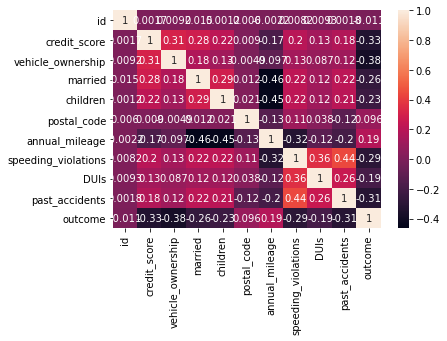

In [17]:
sns.heatmap(data.corr(),annot=True)